In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Load the California housing dataset instead of the Boston dataset
from sklearn.datasets import fetch_california_housing

# Fetch the California housing data
housing = fetch_california_housing()


In [3]:
df = pd.read_csv('HousingData.csv')

# Display the first few rows of the dataset
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
df.info()  # To check column names and types
df.describe()  # To get a statistical summary of the dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
X = df[['RM', 'LSTAT', 'DIS']]  # Features: number of rooms, lower status population, distance to employment centers
y = df['MEDV']  # Target: median value of homes (housing prices)

# Remove rows with missing values in the selected features
X_clean = X.dropna()
y_clean = y[X_clean.index]  # Ensure the target variable matches the cleaned features

In [7]:
# Split the cleaned data into training and testing sets
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)


In [8]:
# Create and train the linear regression model
model_clean = LinearRegression()
model_clean.fit(X_train_clean, y_train_clean)

LinearRegression()

In [9]:
# Make predictions on the test set
y_pred_clean = model_clean.predict(X_test_clean)

In [10]:
# Calculate the Mean Squared Error and R-squared
mse_clean = mean_squared_error(y_test_clean, y_pred_clean)
r2_clean = r2_score(y_test_clean, y_pred_clean)


In [11]:
# Display results
print(f"Mean Squared Error: {mse_clean}")
print(f"R-squared: {r2_clean}")

Mean Squared Error: 23.18834209869553
R-squared: 0.6573054719741147


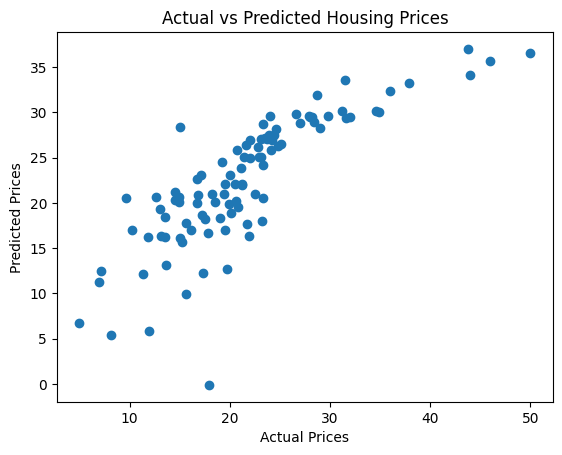

In [12]:
# Plot actual vs predicted prices
plt.scatter(y_test_clean, y_pred_clean)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Housing Prices")
plt.show()

In [17]:
from sklearn.linear_model import Ridge, Lasso
#Regularization (Ridge and Lasso Regression)
ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=0.1)

ridge_model.fit(X_train_clean, y_train_clean)
lasso_model.fit(X_train_clean, y_train_clean)


Lasso(alpha=0.1)

In [20]:
from sklearn.model_selection import cross_val_score

# 5-Fold Cross-Validation
# Specify the model you want to use (e.g., ridge_model or lasso_model)
scores = cross_val_score(ridge_model, X_train_clean, y_train_clean, cv=5, scoring='r2')
print(f"Average R2 score from cross-validation: {scores.mean()}")

Average R2 score from cross-validation: 0.6198231222173509


In [22]:
importance = ridge_model.coef_
print("Feature importance:", importance)


Feature importance: [ 4.82048572 -0.73548689 -0.51485415]


In [23]:
importance = model_clean.coef_
print("Feature importance:", importance)


Feature importance: [ 4.85886306 -0.73297869 -0.51349335]
